In [38]:
import sys
print(sys.executable)

c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Scripts\python.exe


### Import des bibliothèques

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Chargement des données brutes

In [40]:
clients = pd.read_csv("../data/raw/Clients.csv")

### Nettoyage des données

In [41]:
# Affichage des premières lignes
print("Aperçu des données brutes:")
clients.head()

Aperçu des données brutes:


,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25,F,159,En Couple,2,false,3467 SB 72
1,53,M,594,En Couple,2,false,113 LY 42
2,20,F,949,En Couple,1,false,925 WK 87
3,29,M,571,En Couple,2,false,3279 RV 81
4,47,M,502,En Couple,1,false,82 RZ 54


In [42]:
# Vérification des types de données 
print("\nInformations sur les données:")
clients.info()


Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  object
 1   sexe                100000 non-null  object
 2   taux                100000 non-null  object
 3   situationFamiliale  100000 non-null  object
 4   nbEnfantsAcharge    100000 non-null  object
 5   2eme voiture        100000 non-null  object
 6   immatriculation     100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [43]:
# Conversion en type numérique en remplaçant les valeurs non convertibles par NaN
clients['age'] =  pd.to_numeric(clients['age'], errors='coerce')
clients['taux'] = pd.to_numeric(clients['taux'], errors='coerce')
clients['nbEnfantsAcharge'] = pd.to_numeric(clients['nbEnfantsAcharge'], errors='coerce')

In [44]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
clients.isnull().sum()


Valeurs manquantes par colonne:


age                   193
sexe                    0
taux                  194
situationFamiliale      0
nbEnfantsAcharge      200
2eme voiture            0
immatriculation         0
dtype: int64

In [45]:
# Compter les occurrences pour chaque colonne de type 'object'
for col in clients.columns:
    if clients[col].dtype == 'object':
        print(clients[col].value_counts())
        print()
# or
# clients['sexe'].unique() #...

sexe
M           68283
F           29388
Homme         743
Masculin      684
Féminin       322
Femme         289
?             103
              102
N/D            86
Name: count, dtype: int64

situationFamiliale
En Couple      63855
Célibataire    29841
Seule           4989
Marié(e)         664
Seul             282
N/D              111
                 110
?                 98
Divorcée          50
Name: count, dtype: int64

2eme voiture
false    86845
true     12935
           118
?          102
Name: count, dtype: int64

immatriculation
835 JQ 59     2
4229 XL 63    2
7084 RU 46    2
3648 SM 17    2
3142 RV 53    2
             ..
5659 SO 55    1
6760 YM 11    1
385 UN 57     1
4056 HI 13    1
3467 SB 72    1
Name: count, Length: 99989, dtype: int64



In [46]:
# Remplacer les valeurs incorrectes (erreurs de saisie) par NaN
clients.replace(['?', 'N/D', ' '], pd.NA, inplace=True)

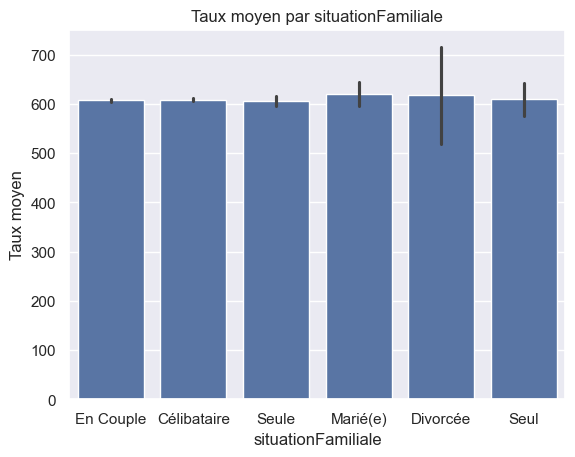

In [47]:
# Analyse des variables catégoriques
if 'situationFamiliale' in clients.columns and 'taux' in clients.columns:
    plt.figure()
    sns.barplot(x='situationFamiliale', y='taux', data=clients)
    plt.title('Taux moyen par situationFamiliale')
    plt.xlabel('situationFamiliale')
    plt.ylabel('Taux moyen')
    plt.show()

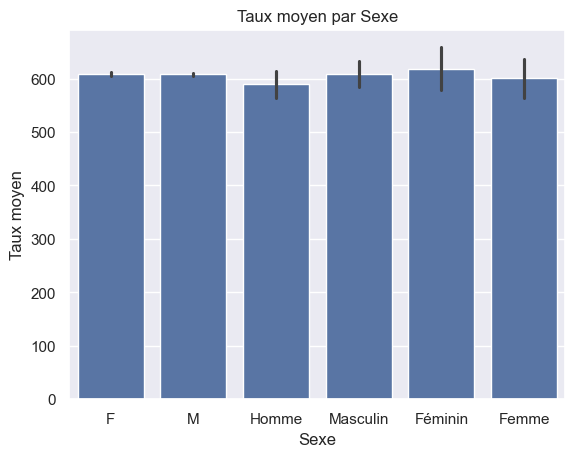

In [48]:
# Analyse des variables catégoriques
if 'sexe' in clients.columns and 'taux' in clients.columns:
    plt.figure()
    sns.barplot(x='sexe', y='taux', data=clients)
    plt.title('Taux moyen par Sexe')
    plt.xlabel('Sexe')
    plt.ylabel('Taux moyen')
    plt.show()

In [49]:
# Remplacer les valeurs dans la colonne "sexe"
clients['sexe'] = clients['sexe'].replace({
    'Homme': 'M',
    'Masculin': 'M',
    'Féminin': 'F',
    'Femme': 'F',
})

In [50]:
# Remplacer les valeurs dans la colonne "situationFamiliale"
clients['situationFamiliale'] = clients['situationFamiliale'].replace({
    'Seule': 'Célibataire',
    'Seul': 'Célibataire',
})

In [51]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
clients.isnull().sum()


Valeurs manquantes par colonne:


age                   193
sexe                  291
taux                  194
situationFamiliale    319
nbEnfantsAcharge      200
2eme voiture          220
immatriculation         0
dtype: int64

In [52]:
# Recherche des doublons
duplicates = clients.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")


Nombre de doublons : 0


In [53]:
# Suppression des doublons
# df = df.drop_duplicates()

In [54]:
clients.describe(include='object')

,sexe,situationFamiliale,2eme voiture,immatriculation
count,99709,99681,99780,100000
unique,2,4,2,99989
top,M,En Couple,false,835 JQ 59
freq,69710,63855,86845,2


In [55]:
clients.describe()

,age,taux,nbEnfantsAcharge
count,99807.000000,99806.000000,99800.000000
mean,43.733335,607.800503,1.245150
std,18.355480,336.279121,1.388624
min,-1.000000,-1.000000,-1.000000
25%,28.000000,420.000000,0.000000
50%,42.000000,520.000000,1.000000
75%,57.000000,827.000000,2.000000
max,84.000000,1399.000000,4.000000


### Gérer les valeurs manquantes

In [56]:
# Création d'un nouveau dataframe pour Imputation et Suppression
clients_imputed = clients.copy()
clients_dropped = clients.copy()

In [57]:
# Remplacement des valeurs manquantes pour les colonnes numériques par la médiane
clients_imputed['age'] = clients_imputed['age'].fillna(clients_imputed['age'].median())
clients_imputed['taux'] = clients_imputed['taux'].fillna(clients_imputed['taux'].median())
clients_imputed['nbEnfantsAcharge'] = clients_imputed['nbEnfantsAcharge'].fillna(clients_imputed['nbEnfantsAcharge'].median())

In [58]:
# Remplacement des valeurs manquantes pour les colonnes catégorielles par la valeur la plus fréquente
clients_imputed['sexe'] = clients_imputed['sexe'].fillna(clients_imputed['sexe'].mode()[0])
clients_imputed['situationFamiliale'] = clients_imputed['situationFamiliale'].fillna(clients_imputed['situationFamiliale'].mode()[0])
clients_imputed['2eme voiture'] = clients_imputed['2eme voiture'].fillna(clients_imputed['2eme voiture'].mode()[0])

In [59]:
clients_imputed.describe(include='object')

,sexe,situationFamiliale,2eme voiture,immatriculation
count,100000,100000,100000,100000
unique,2,4,2,99989
top,M,En Couple,false,835 JQ 59
freq,70001,64174,87065,2


In [60]:
clients_imputed.describe()

,age,taux,nbEnfantsAcharge
count,100000.000000,100000.000000,100000.000000
mean,43.729990,607.630170,1.244660
std,18.337916,335.974983,1.387278
min,-1.000000,-1.000000,-1.000000
25%,28.000000,420.000000,0.000000
50%,42.000000,520.000000,1.000000
75%,57.000000,826.000000,2.000000
max,84.000000,1399.000000,4.000000


In [61]:
# Pourcentage de valeurs manquantes
print(clients.isnull().sum() / len(clients) * 100)  

age                   0.193
sexe                  0.291
taux                  0.194
situationFamiliale    0.319
nbEnfantsAcharge      0.200
2eme voiture          0.220
immatriculation       0.000
dtype: float64


In [62]:
# Suppression des lignes avec des valeurs manquantes
clients_dropped = clients_dropped.dropna()

# Vérification des valeurs manquantes dans le nouveau dataframe
print(clients_dropped.isnull().sum())


age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
dtype: int64


### Visualisation des données

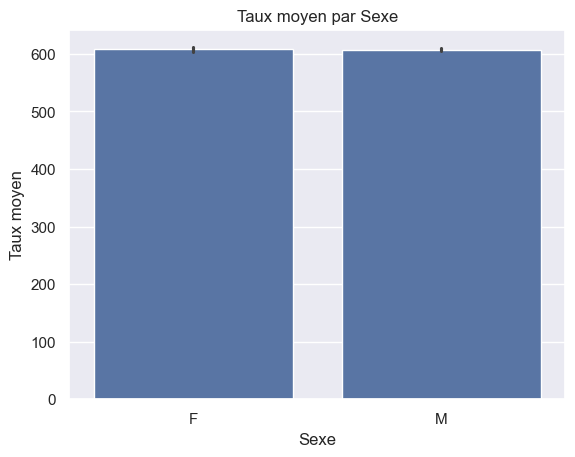

In [63]:
# Analyse des variables catégoriques
if 'sexe' in clients_imputed.columns and 'taux' in clients_imputed.columns:
    plt.figure()
    sns.barplot(x='sexe', y='taux', data=clients_imputed)
    plt.title('Taux moyen par Sexe')
    plt.xlabel('Sexe')
    plt.ylabel('Taux moyen')
    plt.show()

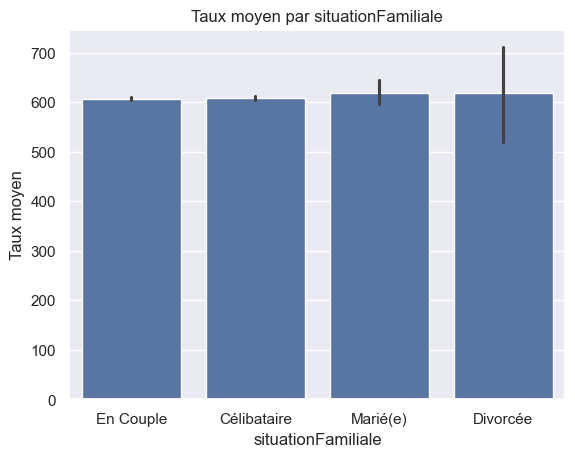

In [64]:
# Analyse des variables catégoriques
if 'situationFamiliale' in clients_imputed.columns and 'taux' in clients_imputed.columns:
    plt.figure()
    sns.barplot(x='situationFamiliale', y='taux', data=clients_imputed)
    plt.title('Taux moyen par situationFamiliale')
    plt.xlabel('situationFamiliale')
    plt.ylabel('Taux moyen')
    plt.show()

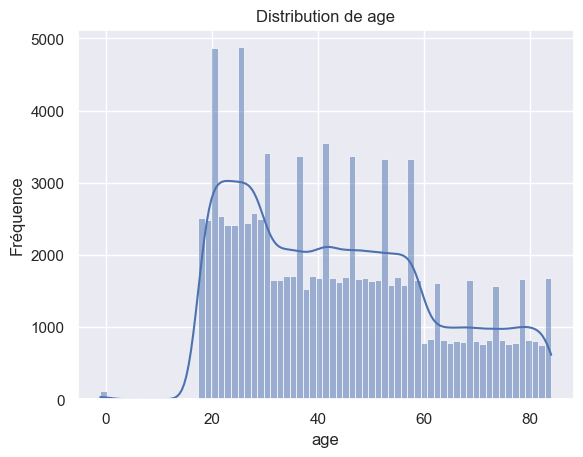

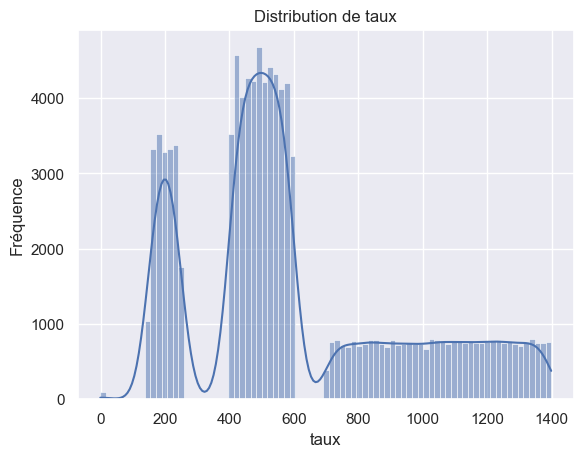

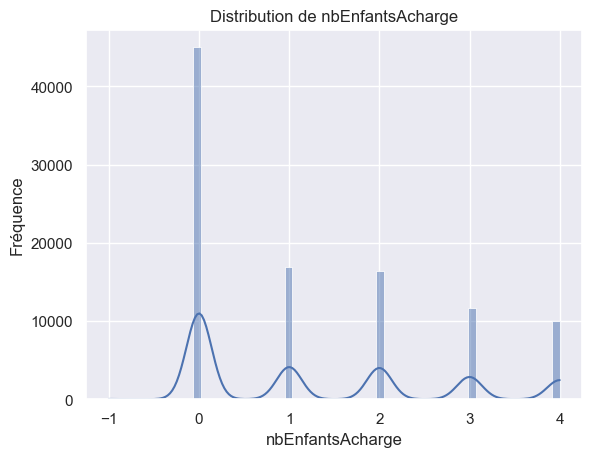

In [65]:
# Histogrammes pour les variables numériques
num_cols = clients_imputed.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(clients_imputed[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

In [66]:
# Initialisation d'un dictionnaire pour stocker les pourcentages
percentages_out_of_bounds = {}

# Définir les contraintes
constraints = {
    'age': (18, 84),
    'taux': (544, 74185),
    'nbEnfantsAcharge': (0, 4)
}

# Calculer le pourcentage des valeurs hors des contraintes pour chaque colonne
for col, (min_val, max_val) in constraints.items():
    total_values = len(clients_imputed)
    out_of_bounds = clients_imputed[(clients_imputed[col] < min_val) | (clients_imputed[col] > max_val)]
    percentage = (len(out_of_bounds) / total_values) * 100
    percentages_out_of_bounds[col] = percentage

# Afficher les résultats
for col, percentage in percentages_out_of_bounds.items():
    print(f"Pourcentage des valeurs hors des contraintes pour '{col}': {percentage:.2f}%")
##

Pourcentage des valeurs hors des contraintes pour 'age': 0.11%
Pourcentage des valeurs hors des contraintes pour 'taux': 55.82%
Pourcentage des valeurs hors des contraintes pour 'nbEnfantsAcharge': 0.11%


In [67]:
#Supprimer les lignes concernées si elles sont insignifiantes par rapport à l'ensemble des données.
clients_imputed = clients_imputed[(clients_imputed['age'] >= 18) & (clients_imputed['age'] <= 84)]

In [68]:
clients_imputed = clients_imputed[(clients_imputed['nbEnfantsAcharge'] >= 0) & (clients_imputed['nbEnfantsAcharge'] <= 4)]

In [69]:
# Filtrer les valeurs de la colonne 'taux' qui respectent les contraintes (entre 544 et 74185).
valid_taux = clients_imputed[(clients_imputed['taux'] >= 544) & (clients_imputed['taux'] <= 74185)]['taux']
# Calculer la moyenne des valeurs valides (celles qui respectent les contraintes) dans la colonne 'taux'.
mean_taux = valid_taux.mean()
# Appliquer une fonction à chaque valeur de la colonne 'taux' :
# Si la valeur est en dehors des contraintes (< 544 ou > 74185), elle est remplacée par la moyenne des valeurs valides.
# Sinon, la valeur d'origine est conservée.
clients_imputed['taux'] = clients_imputed['taux'].apply(lambda x: mean_taux if x < 544 or x > 74185 else x)

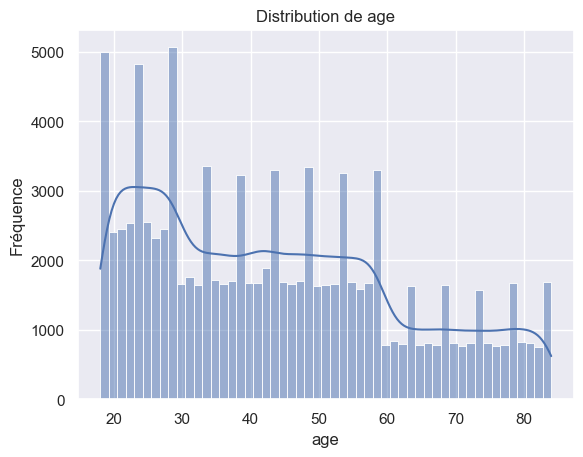

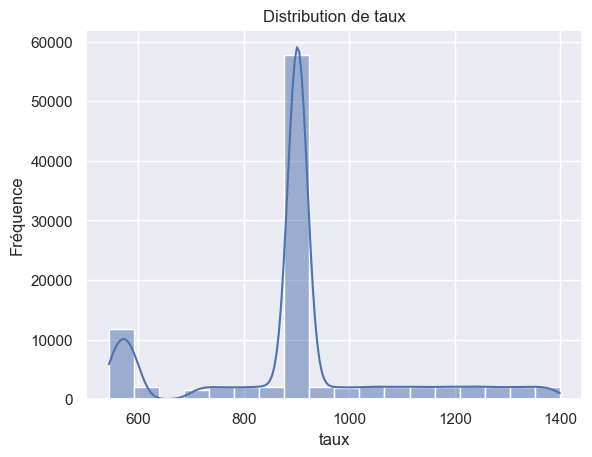

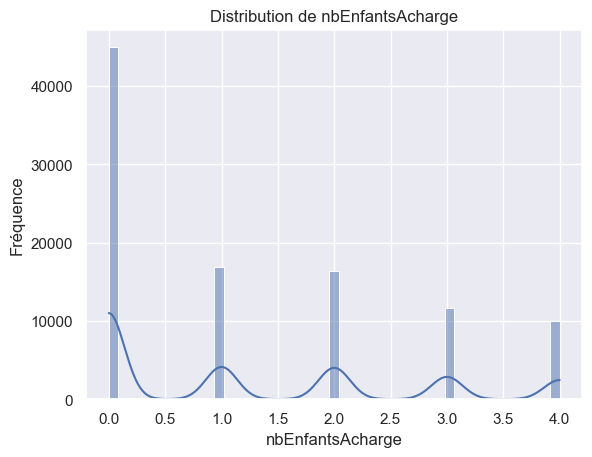

In [70]:
# Histogrammes pour les variables numériques
num_cols = clients_imputed.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(clients_imputed[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

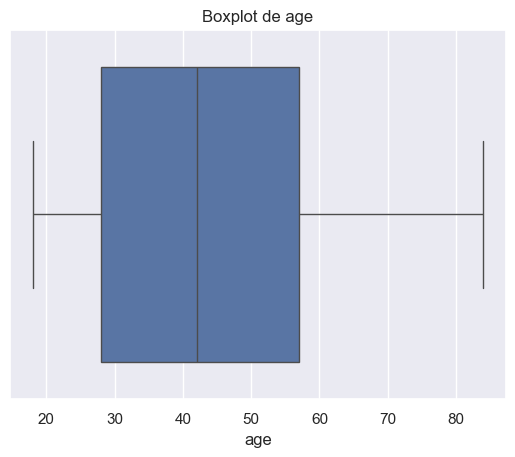

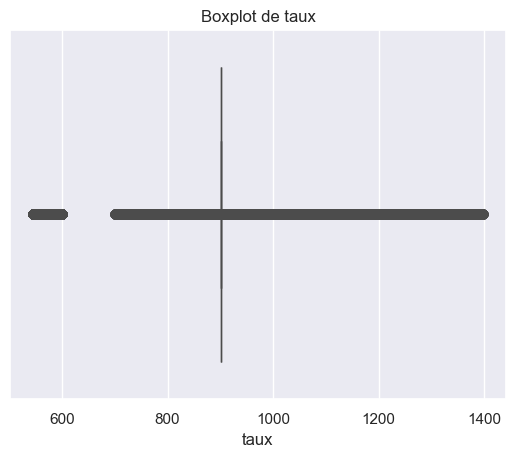

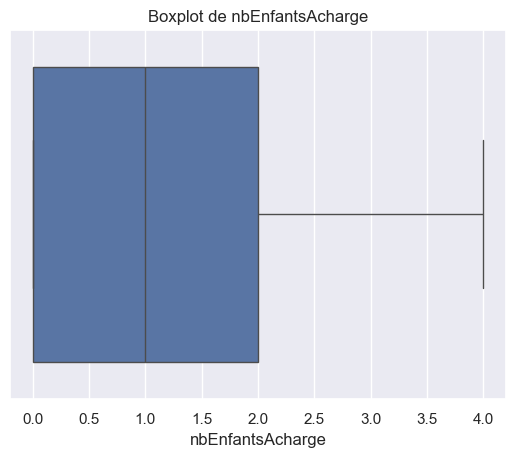

In [71]:
# Boxplots pour détecter les outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=clients_imputed[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [79]:
clients_imputed.columns

Index(['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge',
       '2eme voiture', 'immatriculation'],
      dtype='object')

In [84]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le LabelEncoder
encoder = LabelEncoder()

# Encoder la colonne 'longueur'
clients_imputed['sexe'] = encoder.fit_transform(clients_imputed['sexe'].astype(str))
clients_imputed['situationFamiliale'] = encoder.fit_transform(clients_imputed['situationFamiliale'].astype(str))
clients_imputed['2eme voiture'] = encoder.fit_transform(clients_imputed['2eme voiture'].astype(str))

In [86]:
clients_imputed.head(10)

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25.0,0,901.645491,2,2.0,0,3467 SB 72
1,53.0,1,594.000000,2,2.0,0,113 LY 42
2,20.0,0,949.000000,2,1.0,0,925 WK 87
3,29.0,1,571.000000,2,2.0,0,3279 RV 81
4,47.0,1,901.645491,2,1.0,0,82 RZ 54
5,29.0,0,901.645491,2,3.0,0,8290 SD 41
6,52.0,0,901.645491,2,4.0,1,9339 BW 87
7,58.0,1,901.645491,0,0.0,0,3696 JS 92
8,21.0,1,901.645491,2,4.0,0,6484 MS 45
9,42.0,1,901.645491,2,2.0,0,9896 TW 50


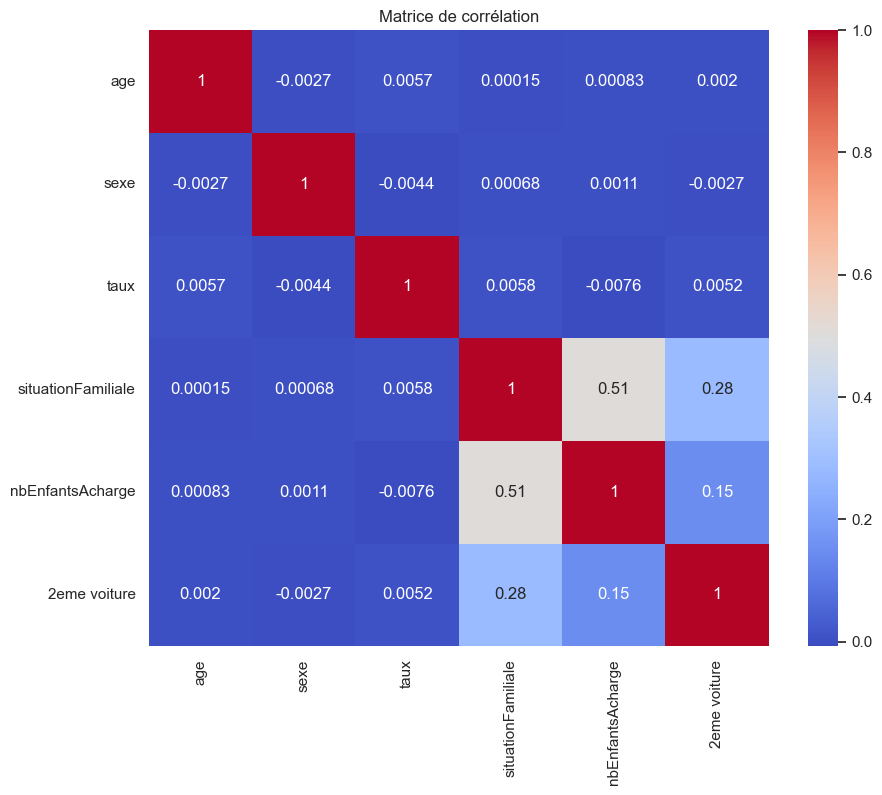

In [85]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(clients_imputed[['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge',
       '2eme voiture']].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [73]:
clients_imputed.describe(include="all")

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
count,99783.000000,99783,99783.000000,99783,99783.000000,99783,99783
unique,NaN,2,NaN,4,NaN,2,99772
top,NaN,M,NaN,En Couple,NaN,false,4229 XL 63
freq,NaN,69850,NaN,64026,NaN,86879,2
mean,43.779181,NaN,901.645491,NaN,1.247046,NaN,NaN
std,18.288575,NaN,184.780982,NaN,1.386109,NaN,NaN
min,18.000000,NaN,544.000000,NaN,0.000000,NaN,NaN
25%,28.000000,NaN,901.645491,NaN,0.000000,NaN,NaN
50%,42.000000,NaN,901.645491,NaN,1.000000,NaN,NaN
75%,57.000000,NaN,901.645491,NaN,2.000000,NaN,NaN


In [74]:
# J'utilise le dataframe clients_imputed
clients_imputed.to_csv('../data/processed/clients_processed.csv', index=False)
print("\nDonnées nettoyées sauvegardées dans 'clients_processed.csv'")


Données nettoyées sauvegardées dans 'clients_processed.csv'
